Data saved to data_stream.csv


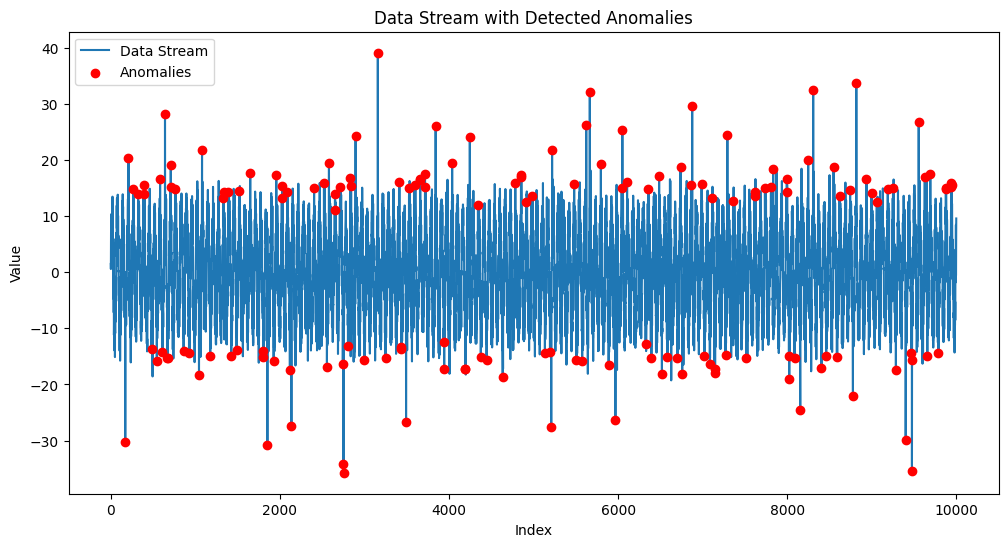

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def simulate_data_stream(size, anomaly_count, anomaly_magnitude, noise_level):
    # Simulate a data stream with seasonal patterns and random noise, including random anomalies.
    np.random.seed(42)  # For reproducibility
    time = np.arange(size)
    seasonal = 10 * np.sin(0.1 * time)  # Seasonal pattern
    noise = np.random.normal(0, noise_level, size)  # Random noise
    data = seasonal + noise

    # Randomly introduce anomalies
    anomaly_indices = np.random.choice(size, size=anomaly_count, replace=False)
    anomalies = np.random.uniform(-anomaly_magnitude, anomaly_magnitude, anomaly_count)
    data[anomaly_indices] += anomalies  # Inject anomalies

    return data

def detect_anomalies_zscore(data, threshold=2.5, window_size=50):
    # Detect anomalies in the data using a rolling Z-score method.
    anomalies = []
    for i in range(window_size, len(data)):
        window = data[i-window_size:i]
        mean = np.mean(window)
        std_dev = np.std(window)
        z_score = (data[i] - mean) / std_dev if std_dev > 0 else 0

        if abs(z_score) > threshold:
            anomalies.append(i)

    return anomalies

def detect_anomalies_isolation_forest(data):
    # Detect anomalies using Isolation Forest.
    model = IsolationForest(contamination='auto', random_state=42)
    data_reshaped = data.reshape(-1, 1)  # Reshape for sklearn
    model.fit(data_reshaped)
    anomalies = np.where(model.predict(data_reshaped) == -1)[0]

    return anomalies.tolist()

def save_to_csv(data, filename='data_stream.csv'):
    # Save the data to a CSV file.
    df = pd.DataFrame(data, columns=['Data'])
    df.to_csv(filename, index=False)
    print(f'Data saved to {filename}')

def plot_data(data, anomalies):
    # Plot the data stream and highlight anomalies.
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Data Stream')
    plt.scatter(anomalies, data[anomalies], color='red', label='Anomalies', zorder=5)
    plt.title('Data Stream with Detected Anomalies')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    plt.savefig("output.jpg")

if __name__ == '__main__':
    # Simulate data stream
    data_stream = simulate_data_stream(size=10000, anomaly_count=100, anomaly_magnitude=30, noise_level=3)

    # Detect anomalies using Z-score method
    anomalies_zscore = detect_anomalies_zscore(data_stream, threshold=2.5, window_size=50)

    # Detect anomalies using Isolation Forest
    anomalies_if = detect_anomalies_isolation_forest(data_stream)

    # Save data to CSV
    save_to_csv(data_stream)

    # Plot the results
    plot_data(data_stream, anomalies_zscore)
